In [1]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../data/yellow_tripdata_2016-06.csv')
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2016-06-09 21:06:36,2016-06-09 21:13:08,2,0.79,-73.983360,40.760937,1,N,-73.977463,40.753979,2,6.0,0.5,0.5,0.00,0.0,0.3,7.30
1,2,2016-06-09 21:06:36,2016-06-09 21:35:11,1,5.22,-73.981720,40.736668,1,N,-73.981636,40.670242,1,22.0,0.5,0.5,4.00,0.0,0.3,27.30
2,2,2016-06-09 21:06:36,2016-06-09 21:13:10,1,1.26,-73.994316,40.751072,1,N,-74.004234,40.742168,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36
3,2,2016-06-09 21:06:36,2016-06-09 21:36:10,1,7.39,-73.982361,40.773891,1,N,-73.929466,40.851540,1,26.0,0.5,0.5,1.00,0.0,0.3,28.30
4,2,2016-06-09 21:06:36,2016-06-09 21:23:23,1,3.10,-73.987106,40.733173,1,N,-73.985909,40.766445,1,13.5,0.5,0.5,2.96,0.0,0.3,17.76


In [3]:
# drop trips without passengers
inds = df[df.passenger_count ==0].index;
print 'No passengers: ',len(inds),' trips';
df.drop(inds,inplace = True);


inds = df[df.tpep_dropoff_datetime == df.tpep_pickup_datetime].index;
print 'Zero duration: ',len(inds),' trips';
df.drop(inds,inplace = True);

#round 
#df['tpep_pickup_datetime'] = pd.DatetimeIndex(df['tpep_pickup_datetime']).round('1H') ;


# delete empty trips
inds = df[df.trip_distance == 0].index;
print 'Zero distance: ',len(inds),' trips';
df.drop(inds,inplace = True);

No passengers:  406  trips
Zero duration:  11443  trips
Zero distance:  59371  trips


In [4]:
df['pickup_datetime'] = pd.DatetimeIndex(df['tpep_pickup_datetime']).floor('1H') ;

In [45]:
# координаты региона 1075
coords = [-74.0222464, -74.0111348, 40.6974368, 40.705825]
df2 = df.query('(pickup_longitude > @coords[0]) and (pickup_longitude < @coords[1]) and (pickup_latitude > @coords[2]) and (pickup_latitude < @coords[3])')
gr = df2.get(['VendorID','pickup_datetime']).groupby('pickup_datetime')
res1 = gr.count()

In [51]:
res1 = gr.count()
res1 = res1.VendorID
res1 = res1.loc['06-2016':'07-2016']
res1.head()

pickup_datetime
2016-06-01 00:00:00    26
2016-06-01 01:00:00    14
2016-06-01 02:00:00     5
2016-06-01 03:00:00     2
2016-06-01 04:00:00     1
Name: VendorID, dtype: int64

In [34]:
# координаты региона 2168
coords = [-73.7777912,-73.7666796,40.6387194,40.6471076]
df2 = df.query('(pickup_longitude > @coords[0]) and (pickup_longitude < @coords[1]) and (pickup_latitude > @coords[2]) and (pickup_latitude < @coords[3])')
gr = df2.get(['VendorID','pickup_datetime']).groupby('pickup_datetime')

I'm goning to try submit original data with some noise.

In [9]:
df3 = pd.read_pickle('df3.pcl')

In [11]:
df3.head()

,y,weekSin1,weekSin2,month,hour_19,hour_9,hour_8,year,hour_5,hour_4,...,region_1684,region_1733,region_1734,region_1783,region_2068,region_2069,region_2118,region_2119,region_2168,region
2014-01-01 00:00:00,87,0.000000,0.000000,1,0,0,0,2014,0,0,...,0,0,0,0,0,0,0,0,0,1075
2014-01-01 01:00:00,92,0.018699,0.037391,1,0,0,0,2014,0,0,...,0,0,0,0,0,0,0,0,0,1075
2014-01-01 02:00:00,108,0.037391,0.074730,1,0,0,0,2014,0,0,...,0,0,0,0,0,0,0,0,0,1075
2014-01-01 03:00:00,77,0.056070,0.111964,1,0,0,0,2014,0,0,...,0,0,0,0,0,0,0,0,0,1075
2014-01-01 04:00:00,47,0.074730,0.149042,1,0,0,0,2014,0,1,...,0,0,0,0,0,0,0,0,0,1075


In [54]:
res2 = df3.query("region == '1075'").y
res2 = res2.loc['06-2016':'07-2016'] 

In [ ]:
def saveResults(rdf, fName):
    rnd = np.round

    f = open(fName,'w')
    f.writelines('id,y\n')

    for ind, row in rdf.iterrows():
        historyStart = row.date - datetime.timedelta(hours = 1)

        if historyStart > datetime.datetime(2016,6,30,17):
            continue

        s0 = str(row.region)+'_'+ str(datetime.datetime.strftime(historyStart, "%Y-%m-%d"))+ '_'+ str(historyStart.hour)

        s1 = s0 +'_1,'+str(rnd(row.get('y1'))) + '\n'
        f.writelines(s1)

        s2 = s0 +'_2,'+str(rnd(row.get('y2'))) + '\n'
        f.writelines(s2)

        s3 = s0 +'_3,'+str(rnd(row.get('y3'))) + '\n'
        f.writelines(s3)

        s4 = s0 +'_4,'+str(rnd(row.get('y4'))) + '\n'
        f.writelines(s4)

        s5 = s0 +'_5,'+str(rnd(row.get('y5'))) + '\n'
        f.writelines(s5)

        s6 = s0 +'_6,'+str(rnd(row.get('y6'))) + '\n'
        f.writelines(s6)

    f.close() 

In [ ]:
df4 = df3.copy()
df4.y = df4.y + 10
df4 = df4.assign(y1 = df4.y.shift(-1))
df4 = df4.assign(y2 = df4.y.shift(-2)).assign(y3 = df4.y.shift(-3))
df4 = df4.assign(y4 = df4.y.shift(-4)).assign(y5 = df4.y.shift(-5)).assign(y6 = df4.y.shift(-6))
df4 = df4.loc['06-2016':'06-2016',['region','y','y1','y2','y3','y4','y5','y6']]
df4.reset_index(inplace=True)
df4.rename(columns={'index':'date'},inplace=True)
df4.fillna(0,inplace=True)
saveResults(df4,'fake1.csv')

In [ ]:
d = [100, 90, 50, 60, 40, 35, 30, 25, 20, 15, 10]
score = [106, 97, 63, 71, 55, 51, 47, 44, 40, 37, 34]
plt.plot(d,score,'x')

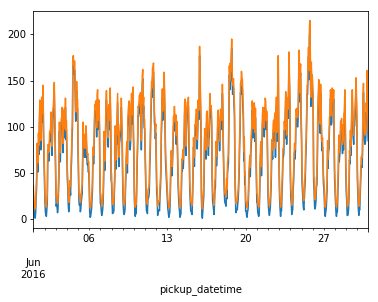

In [57]:
res1.plot()
(res2+10).plot()
#plt.xlim(['06-2016','07-2016'])

In [66]:
regions = pd.read_csv("../data/regions.csv",delimiter=';')
regions.set_index('region',inplace=True)
regions.head()

,west,east,south,north
region,,,,
1,-74.25559,-74.244478,40.496120,40.504508
2,-74.25559,-74.244478,40.504508,40.512896
3,-74.25559,-74.244478,40.512896,40.521285
4,-74.25559,-74.244478,40.521285,40.529673
5,-74.25559,-74.244478,40.529673,40.538061


In [78]:
startDate = datetime.datetime(2016,6,1,0,0,0);
endDate = datetime.datetime(2016,6,30,23,59,59);
date_index = pd.date_range(startDate, endDate, freq='H')

In [154]:
west[0]

-74.0222464

In [178]:
#create dataframe
newDf = pd.DataFrame(index=date_index)

#for regId, pos in regions.iterrows():
for n, regId in regsDf.iterrows():
    
    # координаты региона 1075
    pos = regions.loc[regId,:]
    west = pos.west.values[0]
    east = pos.east.values[0]
    south = pos.south.values[0]
    north = pos.north.values[0]
    

    df2 = df.query('(pickup_longitude > @west) and (pickup_longitude < @east) and (pickup_latitude > @south) and (pickup_latitude < @north)')
    gr  =  df2.get(['VendorID','pickup_datetime']).groupby('pickup_datetime')
    cnt1 = gr.count().reindex(date_index,fill_value =0).VendorID
    s = str(regId.regId)
    cnt2 = df3.query('region == @s').y[startDate:endDate]
    diff = cnt1-cnt2
    print regId, np.sum(np.abs(diff.values))
    #print cnt
    #newDf = newDf.merge(cnt,left_index=True,right_index=True) 

regId    1075
Name: 0, dtype: int64 0
regId    1076
Name: 1, dtype: int64 0
regId    1077
Name: 2, dtype: int64 0
regId    1125
Name: 3, dtype: int64 0
regId    1126
Name: 4, dtype: int64 0
regId    1127
Name: 5, dtype: int64 0
regId    1128
Name: 6, dtype: int64 0
regId    1129
Name: 7, dtype: int64 0
regId    1130
Name: 8, dtype: int64 0
regId    1131
Name: 9, dtype: int64 0
regId    1132
Name: 10, dtype: int64 0
regId    1172
Name: 11, dtype: int64 0
regId    1173
Name: 12, dtype: int64 0
regId    1174
Name: 13, dtype: int64 0
regId    1175
Name: 14, dtype: int64 0
regId    1176
Name: 15, dtype: int64 0
regId    1177
Name: 16, dtype: int64 0
regId    1178
Name: 17, dtype: int64 0
regId    1179
Name: 18, dtype: int64 0
regId    1180
Name: 19, dtype: int64 0
regId    1181
Name: 20, dtype: int64 0
regId    1182
Name: 21, dtype: int64 0
regId    1183
Name: 22, dtype: int64 0
regId    1184
Name: 23, dtype: int64 0
regId    1221
Name: 24, dtype: int64 0
regId    1222
Name: 25, dtype: int6

In [170]:
s

'1184'

In [173]:
cnt2 = df3.query('region == @s').y[startDate:endDate]

In [174]:
type(cnt2)

pandas.core.series.Series

In [175]:
cnt1

,VendorID
2016-06-01 00:00:00,2
2016-06-01 01:00:00,1
2016-06-01 02:00:00,1
2016-06-01 03:00:00,0
2016-06-01 04:00:00,2
2016-06-01 05:00:00,8
2016-06-01 06:00:00,42
2016-06-01 07:00:00,45
2016-06-01 08:00:00,35
2016-06-01 09:00:00,20


In [118]:
regsDf = pd.read_csv('../crowdRegs.csv',names=['id','regId']).set_index('id')

,regId
id,
0,1075
1,1076
2,1077
3,1125
4,1126
5,1127
6,1128
7,1129
8,1130
